In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so

from IPython.display import Image, display

sns.set_theme(style="whitegrid")
sns.set_context("notebook")

# Understand the Data

The data was downloaded directly from Rebrickalbe website. Containing information about the sets, parts, colors, themes, and inventories of LEGO sets. The data is in CSV format and is available for download from the following link: https://rebrickable.com/downloads/

In [2]:
colors =pd.read_csv('colors.csv.gz')
inventories = pd.read_csv('inventories.csv.gz')
inventory_parts = pd.read_csv('inventory_parts.csv.gz')
inventory_sets = pd.read_csv('inventory_sets.csv.gz')
part_categories = pd.read_csv('part_categories.csv.gz')
parts = pd.read_csv('parts.csv.gz')
sets = pd.read_csv('sets.csv.gz')
themes = pd.read_csv('themes.csv.gz')

# EDA
### 1.0 Descriptive Statistics

In [4]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [4]:
sets['set_num'].nunique() == len(sets)

True

What is the range of the year where the sets were released?

In [5]:
sets['year'].describe()

count    23085.000000
mean      2008.436301
std         14.015234
min       1949.000000
25%       2002.000000
50%       2013.000000
75%       2019.000000
max       2025.000000
Name: year, dtype: float64

How many sets are there in the dataset?

In [14]:
sets['set_num'].nunique()

23085

How many unique themes are there in the dataset?

In [15]:
themes['id'].nunique()

463

How many unique colours?

In [16]:
colors['id'].nunique()

267

What is the average number of parts in a set?

In [18]:
sets['num_parts'].describe()

count    23085.000000
mean       163.593156
std        425.239559
min          0.000000
25%          1.000000
50%         30.000000
75%        141.000000
max      11695.000000
Name: num_parts, dtype: float64

The unnique identifier for the `sets` table is `set_num`

In [5]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23085 entries, 0 to 23084
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    23085 non-null  object
 1   name       23085 non-null  object
 2   year       23085 non-null  int64 
 3   theme_id   23085 non-null  int64 
 4   num_parts  23085 non-null  int64 
 5   img_url    23085 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [6]:
sets.name.nunique()

19819

This shows that there are some sets with the same name has been released several times in different `year` or  with different `num_parts`.

Hence, `name` is not unqiue only `set_num` is.

In [7]:
sets['name'].value_counts().head()

Basic Building Set        58
Universal Building Set    34
Helicopter                33
Basic Set                 33
Fire Station              21
Name: name, dtype: int64

There are 58 different Basic Building Set in this dataset.

In [8]:
sets[sets['name'] == 'Basic Building Set']

,set_num,name,year,theme_id,num_parts,img_url
18,010-3,Basic Building Set,1968,365,77,https://cdn.rebrickable.com/media/sets/010-3.jpg
21,011-1,Basic Building Set,1968,365,145,https://cdn.rebrickable.com/media/sets/011-1.jpg
26,022-1,Basic Building Set,1968,365,110,https://cdn.rebrickable.com/media/sets/022-1.jpg
36,033-2,Basic Building Set,1968,365,177,https://cdn.rebrickable.com/media/sets/033-2.jpg
41,044-1,Basic Building Set,1968,365,225,https://cdn.rebrickable.com/media/sets/044-1.jpg
54,055-2,Basic Building Set,1968,365,256,https://cdn.rebrickable.com/media/sets/055-2.jpg
65,066-1,Basic Building Set,1968,365,407,https://cdn.rebrickable.com/media/sets/066-1.jpg
1010,1106-2,Basic Building Set,1999,470,431,https://cdn.rebrickable.com/media/sets/1106-2.jpg
1209,120438-1,Basic Building Set,1985,467,176,https://cdn.rebrickable.com/media/sets/120438-...
1626,1511-1,Basic Building Set,1986,467,67,https://cdn.rebrickable.com/media/sets/1511-1.jpg


#### Self Join on Themes to get the parent theme of each theme

In [37]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         463 non-null    int64  
 1   name       463 non-null    object 
 2   parent_id  323 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.0+ KB


There are some NAs in `parent_id` column. This is because some theme belongs to a more general theme and some theme does not belong to any general theme.

We can perform a self join to get the name of the parent theme for each theme (if they have one).

In [38]:
themes_sj = themes.merge(themes, how='left', left_on='parent_id', right_on='id', suffixes=('_theme', '_parent'))
themes_sj.drop(columns=['id_parent', 'parent_id_theme', 'id_parent', 'parent_id_parent'], inplace=True)

In [39]:
themes_sj.head(5)

,id_theme,name_theme,name_parent
0,1,Technic,NaN
1,3,Competition,Technic
2,4,Expert Builder,Technic
3,16,RoboRiders,Technic
4,17,Speed Slammers,Technic


In [40]:
themes_sj[themes_sj['name_theme'].str.startswith('Star')]

,id_theme,name_theme,name_parent
5,18,Star Wars,Technic
74,158,Star Wars,NaN
95,209,Star Wars,Advent
122,261,Star Wars,Mindstorms


So we can see some theme belong to a parent theme which is a more general theme. 

For example, the theme Star Wars could belong to a more general parent theme Technic or Advent or Mindsotrms or None.

In [41]:
themes_sj[themes_sj['name_parent'].isna()]

,id_theme,name_theme,name_parent
0,1,Technic,NaN
9,22,Creator,NaN
10,34,Make & Create,NaN
12,50,Town,NaN
14,52,City,NaN
...,...,...,...
446,749,Dreamzzz,NaN
449,752,Animal Crossing,NaN
460,763,Despicable Me 4,NaN
461,764,The Legend of Zelda,NaN


#### Join The Sets and Theme Tables

In [42]:
joined = pd.merge(sets, themes_sj, left_on='theme_id', right_on='id_theme', suffixes=('_sets', '_themes'))
joined.head()

,set_num,name,year,theme_id,num_parts,img_url,id_theme,name_theme,name_parent
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,761,Activity Books with LEGO Parts,Books
1,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,761,4,https://cdn.rebrickable.com/media/sets/0022539...,761,Activity Books with LEGO Parts,Books
2,0241187567-1,Ninjago: Build Your Own Adventure,2015,761,74,https://cdn.rebrickable.com/media/sets/0241187...,761,Activity Books with LEGO Parts,Books
3,0241357594-1,Star Wars: Build Your Own Adventure: Galactic ...,2019,761,70,https://cdn.rebrickable.com/media/sets/0241357...,761,Activity Books with LEGO Parts,Books
4,0756668530-1,Atlantis: Brickmaster,2010,761,157,https://cdn.rebrickable.com/media/sets/0756668...,761,Activity Books with LEGO Parts,Books


In [43]:
# Keep only useful columns and rename them
joined = joined[['set_num', 'name', 'year','theme_id', 'num_parts', 'name_theme', 'name_parent']]
joined.columns = ['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'theme_name', 'theme_parent_name']

joined.head()

,set_num,set_name,year,theme_id,num_parts,theme_name,theme_parent_name
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,Activity Books with LEGO Parts,Books
1,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,761,4,Activity Books with LEGO Parts,Books
2,0241187567-1,Ninjago: Build Your Own Adventure,2015,761,74,Activity Books with LEGO Parts,Books
3,0241357594-1,Star Wars: Build Your Own Adventure: Galactic ...,2019,761,70,Activity Books with LEGO Parts,Books
4,0756668530-1,Atlantis: Brickmaster,2010,761,157,Activity Books with LEGO Parts,Books


## 2.0 Missing Data

In [40]:
tables = [colors, inventories, inventory_parts, inventory_sets, part_categories, parts, sets, themes]

for table in tables:
    print(table.isnull().sum())
    print('=====================================')

id          0
name        0
rgb         0
is_trans    0
dtype: int64
id         0
version    0
set_num    0
dtype: int64
inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         7065
dtype: int64
inventory_id    0
set_num         0
quantity        0
dtype: int64
id      0
name    0
dtype: int64
part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64
set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64
id             0
name           0
parent_id    140
dtype: int64


## 3.0 Outliers

In [18]:
def get_outliers(df, numercial_col):
    """Identify outliers and returns theirs indices"""
    Q1 = sets[numercial_col].quantile(0.25)
    Q3 = sets[numercial_col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[numercial_col] < lower_bound) | (df[numercial_col] > upper_bound)]
    print("outliers is smaller than", lower_bound, "or greater than", upper_bound)
    return outliers

In [19]:
get_outliers(sets, 'num_parts')

outliers is smaller than -209.0 or greater than 351.0


,set_num,name,year,theme_id,num_parts,img_url
11,003-1,Master Mechanic Set,1966,756,403,https://cdn.rebrickable.com/media/sets/003-1.jpg
12,004-1,Master Builder Set,1966,756,817,https://cdn.rebrickable.com/media/sets/004-1.jpg
19,010423-1,The Majestic Horse,2023,721,492,https://cdn.rebrickable.com/media/sets/010423-...
65,066-1,Basic Building Set,1968,365,407,https://cdn.rebrickable.com/media/sets/066-1.jpg
66,066-2,Governor Set,1968,756,407,https://cdn.rebrickable.com/media/sets/066-2.jpg
...,...,...,...,...,...,...
22832,RAT-1,Easy Build Building Happening Rat,2020,206,754,https://cdn.rebrickable.com/media/sets/rat-1.jpg
22858,SDCC2010-1,CubeDude - The Clone Wars Edition,2010,158,416,https://cdn.rebrickable.com/media/sets/sdcc201...
22927,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462,https://cdn.rebrickable.com/media/sets/swmp-1.jpg
23056,WEETABIX1-1,Weetabix Castle,1970,414,471,https://cdn.rebrickable.com/media/sets/weetabi...


In [23]:
sets[sets['num_parts'] > 9000]

,set_num,name,year,theme_id,num_parts,img_url
392,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...
411,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
425,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
4470,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
21724,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...


In [31]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 4.0 Class imbalance

In [32]:
colors['is_trans'].value_counts()

f    222
t     45
Name: is_trans, dtype: int64

In [45]:
joined['theme_name'].value_counts()

Star Wars              960
Technic                889
Key Chain              729
Gear                   691
Friends                616
                      ... 
Universe                 2
The Powerpuff Girls      2
Aquazone                 1
The Legend of Zelda      1
Mini                     1
Name: theme_name, Length: 390, dtype: int64

In [49]:
inventories['version'].value_counts()

1     37723
2      1103
3       203
4       150
5       110
6        58
7        37
8        27
9        20
10       16
11        3
12        2
13        1
14        1
15        1
16        1
Name: version, dtype: int64

## A.  Examine the distribution of LEGO sets over years, themes, and piece counts.

In [25]:
df = joined.groupby('year').agg({'set_num' : 'count', 'num_parts': ['mean', 'median']})
df.head()

set_num  num_parts       
       count       mean median
year                          
1949       5  99.600000  142.0
1950       6   1.000000    1.0
1953       4  12.500000    1.0
1954      14   8.357143    1.0
1955      39  12.205128    6.0

In [16]:
df[df[('set_num', 'count')] == df[('set_num', 'count')].max()]

set_num   num_parts       
       count        mean median
year                           
2021    1163  228.226999   15.0

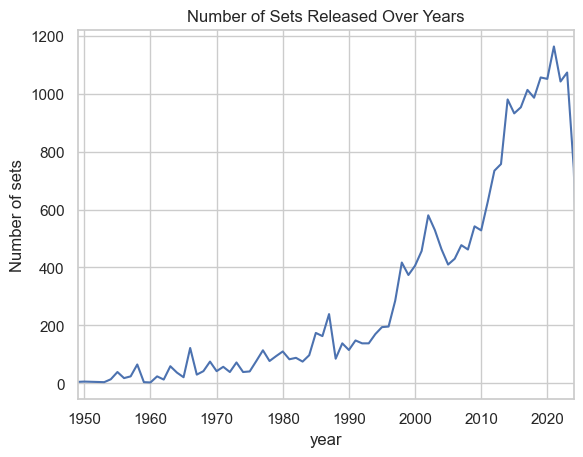

In [17]:
sns.lineplot(data=df, x = 'year', y = ('set_num', 'count'))
plt.title('Number of Sets Released Over Years')
plt.ylabel('Number of sets')
plt.xlim(df.index.min(), df.index.max() - 1);

- The number of sets released has been increasing over the years. 
- Growing rate is much higher after 2000.
- The number of sets released in 2021 is the highest in the dataset.

#### Number of Parts in Sets Over Years

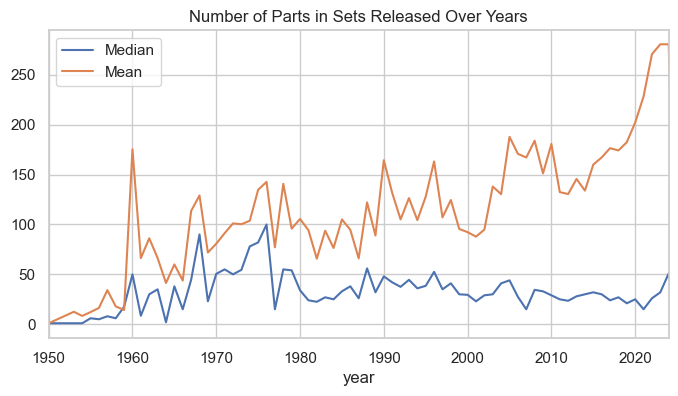

In [18]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x = 'year', y = ('num_parts','median'), label='Median')
sns.lineplot(data=df, x = 'year', y = ('num_parts','mean'), label='Mean')

plt.title('Number of Parts in Sets Released Over Years')
plt.ylabel('')
plt.xlim(df.index.min() + 1, df.index.max() -1);

- The average number of parts per set follows the same increasing trend over the years. While the median number of parts remains steady. 
- From earlier period the gap between median and mean is small and from 2000 onwards the gap is increasing. It means that there are sets in the later years that have very large number of parts or very few number of parts which affects the mean.

Here are the top sets with highest number of parts:

In [19]:
percentile_75 = joined['num_parts'].quantile(.75)

joined[joined['num_parts'] > percentile_75].sort_values('num_parts', ascending=False).head(10)

,set_num,set_name,year,theme_id,num_parts,theme_name,theme_parent_name
15859,31203-1,World Map,2021,709,11695,LEGO Art,NaN
1409,10307-1,Eiffel Tower,2022,721,10001,Icons,NaN
18533,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,Legends of Chima,NaN
1399,10294-1,Titanic,2021,721,9092,Icons,NaN
1386,10276-1,Colosseum,2020,721,9036,Icons,NaN
3734,75192-1,Millennium Falcon,2017,171,7541,Ultimate Collector Series,Star Wars
3738,75313-1,AT-AT,2021,171,6785,Ultimate Collector Series,Star Wars
3739,75331-1,The Razor Crest,2022,171,6187,Ultimate Collector Series,Star Wars
1415,10316-1,Lord of the Rings: Rivendell,2023,721,6181,Icons,NaN
9613,71799-1,NINJAGO City Markets,2023,435,6163,Ninjago,NaN


The set with the highest number of parts is World Map with 11695 parts.

In [20]:
percentile_25 = joined['num_parts'].quantile(.25)

joined[joined['num_parts'] < percentile_25].sort_values(by=['year', 'num_parts'], ascending=False).head(10)

,set_num,set_name,year,theme_id,num_parts,theme_name,theme_parent_name
13470,9781837250615-1,ReBuild Activity Cards: Celebration,2025,741,0,Tabletop Games and Puzzles,Gear
13471,9781837250622-1,ReBuild Activity Cards: Animals,2025,741,0,Tabletop Games and Puzzles,Gear
13472,9781837250639-1,ReBuild Activity Cards: Magic,2025,741,0,Tabletop Games and Puzzles,Gear
13473,9781837250646-1,ReBuild Activity Cards: Space,2025,741,0,Tabletop Games and Puzzles,Gear
13641,9780241716397-1,How to Build Everything,2025,757,0,Ideas Books,Books
13642,9780241727416-1,LEGO Ideas Activity Book: Animals,2025,757,0,Ideas Books,Books
13643,9780241727423-1,LEGO Ideas Activity Book: Space,2025,757,0,Ideas Books,Books
111,9780241706008-1,Easter Ideas,2024,761,0,Activity Books with LEGO Parts,Books
238,9781837250011-1,Dreamzzz: Cooper in Action,2024,761,0,Activity Books with LEGO Parts,Books
240,9781837250035-1,Star Wars: Mandalorian Warriors,2024,761,0,Activity Books with LEGO Parts,Books


And there are many sets which contains 0 `num_parts` released in later years which also contribute to the difference between mean and median.

#### Theme Popularity

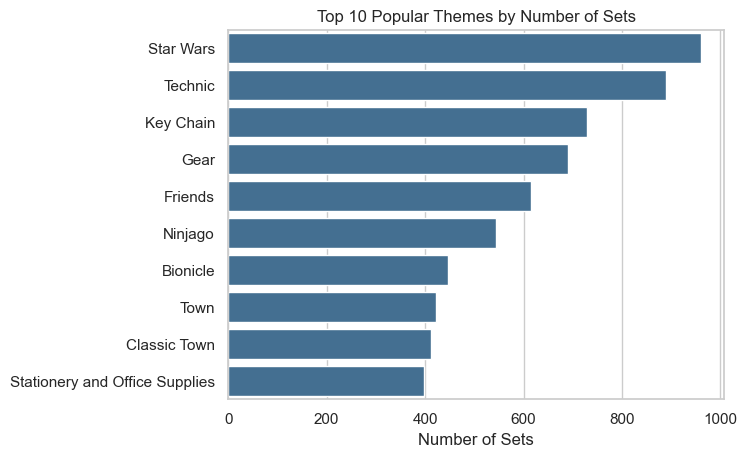

In [21]:
df = joined['theme_name'].value_counts().head(10).to_frame(name='count')
sns.barplot(data=df, x='count', y=df.index, color='#37719E')
plt.title('Top 10 Popular Themes by Number of Sets')
plt.xlabel('Number of Sets');

Star Wars is the most popular theme in the dataset, follwed by Technic and Key Chain.

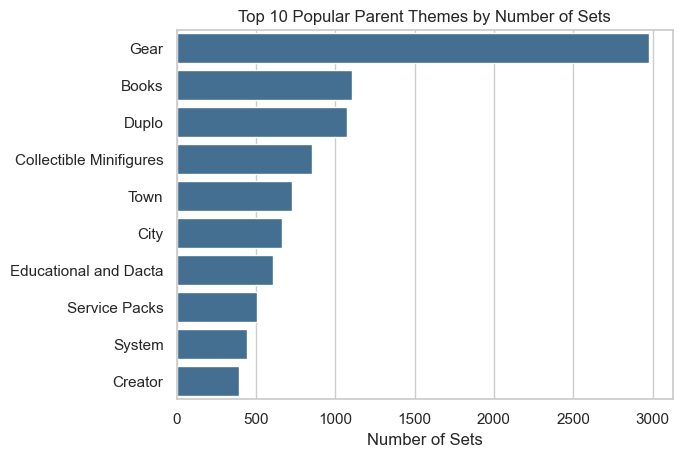

In [22]:
df = joined['theme_parent_name'].value_counts().head(10).to_frame(name='count')
sns.barplot(data=df, x='count', y=df.index, color='#37719E')
plt.title('Top 10 Popular Parent Themes by Number of Sets')
plt.xlabel('Number of Sets');

The above plot gives us a boarder views of the more general themes and their popularity with Gear dominating the list with almost 3000 sets released.

### Explore trends and patterns related to LEGO set releases and discontinuations/retirements.

#### Join / Prepare Data for Analysis

So to get colour information for a particular set.

JOIN sets and inventories ON set_num = set_num  
JOIN inventory_parts ON inventories.id = inventory_id  
JOIN colors ON inventory_parts.color_id = colors.id

In [23]:
sets.shape

(23085, 6)

In [24]:
df = sets.merge(inventories, on='set_num', how='left', indicator=True)
df.head()

,set_num,name,year,theme_id,num_parts,img_url,id,version,_merge
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,206820,1,both
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,24696,1,both
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,5087,1,both
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,2216,1,both
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,1414,1,both


In [25]:
df.shape

(24815, 9)

Why the merged dataframe has more rows than the original sets dataframe?  
There are some duplicated rows occured. Let's find out why.

In [26]:
df[df['set_num'].duplicated()]['version'].value_counts()

2     1101
3      202
4      150
5      110
6       58
7       37
8       27
9       20
10      16
11       3
12       2
13       1
14       1
15       1
16       1
Name: version, dtype: int64

In [27]:
df[df['set_num'].duplicated()].sort_values('version')

,set_num,name,year,theme_id,num_parts,img_url,id,version,_merge
7,0014-1,Space Mini-Figures,1979,143,2,https://cdn.rebrickable.com/media/sets/0014-1.jpg,163782,2,both
14876,6949-1,Robo-Guardian,1994,142,367,https://cdn.rebrickable.com/media/sets/6949-1.jpg,25854,2,both
14873,6945-1,Bad Guy,2007,324,25,https://cdn.rebrickable.com/media/sets/6945-1.jpg,223430,2,both
14868,6941-1,Battrax,1987,128,284,https://cdn.rebrickable.com/media/sets/6941-1.jpg,20190,2,both
14865,6940-1,Alien Moon Stalker,1986,130,268,https://cdn.rebrickable.com/media/sets/6940-1.jpg,118011,2,both
...,...,...,...,...,...,...,...,...,...
14013,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146108,12,both
14014,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146109,13,both
14015,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146110,14,both
14016,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146111,15,both


In [28]:
df[df['set_num'] == '657-2']

,set_num,name,year,theme_id,num_parts,img_url,id,version,_merge
14002,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146097,1,both
14003,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146098,2,both
14004,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146099,3,both
14005,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146100,4,both
14006,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146101,5,both
14007,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146102,6,both
14008,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146103,7,both
14009,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146104,8,both
14010,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146105,9,both
14011,657-2,1:87 Mercedes Delivery Van,1964,368,1,https://cdn.rebrickable.com/media/sets/657-2.jpg,146106,10,both


It turns out that there are some sets that have multiple inventories `version`. This could be due to: part changes, packaging change region variations, or other reasons.  
For our case, we will remove the extra versions and stick with the original version.

In [29]:
df.drop_duplicates(subset='set_num' ,keep='first', inplace=True)

df['version'].value_counts()

1    23082
2        2
3        1
Name: version, dtype: int64

There are 3 sets whose original version are not 1.  

In [30]:
df[df['version'] > 1]

,set_num,name,year,theme_id,num_parts,img_url,id,version,_merge
908,10875-1,Cargo Train,2018,634,105,https://cdn.rebrickable.com/media/sets/10875-1...,27157,2,both
17701,76081-1,The Milano vs. The Abilisk,2017,704,462,https://cdn.rebrickable.com/media/sets/76081-1...,17793,2,both
24575,S1-1,Baseplate with Steering Control Tongue,1970,443,1,https://cdn.rebrickable.com/media/sets/s1-1.jpg,38444,3,both


A quick look on the website confirms our assumpsion. Eg. Cargo Train's original inventory version is 2.

In [31]:
# Drop unnecessary columns
df.drop(['_merge', 'img_url', 'version'], axis=1, inplace=True)

Now the merged dataframe is free from duplicates, we can merge it with the `inventory_parts` table to get the part information for each set.

In [32]:
df_merged_parts = df.merge(inventory_parts, left_on='id', right_on='inventory_id', how='left', indicator=True)
df_merged_parts.head()

,set_num,name,year,theme_id,num_parts,id,inventory_id,part_num,color_id,quantity,is_spare,img_url,_merge
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,206820,206820.0,21459,179.0,1.0,f,https://cdn.rebrickable.com/media/parts/elemen...,both
1,001-1,Gears,1965,756,43,24696,24696.0,132a,7.0,4.0,f,https://cdn.rebrickable.com/media/parts/ldraw/...,both
2,001-1,Gears,1965,756,43,24696,24696.0,3020,15.0,4.0,f,https://cdn.rebrickable.com/media/parts/elemen...,both
3,001-1,Gears,1965,756,43,24696,24696.0,3062c,15.0,1.0,f,https://cdn.rebrickable.com/media/parts/ldraw/...,both
4,001-1,Gears,1965,756,43,24696,24696.0,3404bc01,15.0,4.0,f,https://cdn.rebrickable.com/media/parts/ldraw/...,both


Note that we used the inner join to merge the dataframes, so we only get the sets with parts that are available in the `inventory_parts` table.

There are sets which is not appeared in the `inventory_parts` table such as sets with 0 `num_parts`.  

Now JOIN with colors to get color information for each part.

In [33]:
df_merged_parts.drop(['_merge', 'img_url', 'id'], axis=1, inplace=True)

In [34]:
df_merged_parts.shape

(1090785, 10)

In [35]:
df_merged_all = df_merged_parts.merge(colors, left_on='color_id', right_on='id', how='inner', indicator=False)
df_merged_all.head()


,set_num,name_x,year,theme_id,num_parts,inventory_id,part_num,color_id,quantity,is_spare,id,name_y,rgb,is_trans
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,206820.0,21459,179.0,1.0,f,179,Flat Silver,898788,f
1,0756682762-1,Ninjago: Brickmaster,2011,761,154,16042.0,4497,179.0,1.0,f,179,Flat Silver,898788,f
2,10217-1,Diagon Alley,2011,246,2029,14029.0,64648,179.0,1.0,f,179,Flat Silver,898788,f
3,10218-1,Pet Shop,2011,155,2034,14858.0,4528,179.0,1.0,f,179,Flat Silver,898788,f
4,10218-1,Pet Shop,2011,155,2034,14858.0,48245,179.0,1.0,f,179,Flat Silver,898788,f


In [36]:
df_merged_all.drop(['part_num', 'id'], axis=1, inplace=True)
df_merged_all.head()

,set_num,name_x,year,theme_id,num_parts,inventory_id,color_id,quantity,is_spare,name_y,rgb,is_trans
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,206820.0,179.0,1.0,f,Flat Silver,898788,f
1,0756682762-1,Ninjago: Brickmaster,2011,761,154,16042.0,179.0,1.0,f,Flat Silver,898788,f
2,10217-1,Diagon Alley,2011,246,2029,14029.0,179.0,1.0,f,Flat Silver,898788,f
3,10218-1,Pet Shop,2011,155,2034,14858.0,179.0,1.0,f,Flat Silver,898788,f
4,10218-1,Pet Shop,2011,155,2034,14858.0,179.0,1.0,f,Flat Silver,898788,f


In [37]:
# Rename columns
column_names = ['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'inventory_id', 'color_id', 'quantity', 
                'is_spare', 'color_name', 'rgb', 'is_trans']

df_merged_all.columns = column_names
df_merged_all.head()

,set_num,set_name,year,theme_id,num_parts,inventory_id,color_id,quantity,is_spare,color_name,rgb,is_trans
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,206820.0,179.0,1.0,f,Flat Silver,898788,f
1,0756682762-1,Ninjago: Brickmaster,2011,761,154,16042.0,179.0,1.0,f,Flat Silver,898788,f
2,10217-1,Diagon Alley,2011,246,2029,14029.0,179.0,1.0,f,Flat Silver,898788,f
3,10218-1,Pet Shop,2011,155,2034,14858.0,179.0,1.0,f,Flat Silver,898788,f
4,10218-1,Pet Shop,2011,155,2034,14858.0,179.0,1.0,f,Flat Silver,898788,f


Create a column for the main color

In [51]:
df_merged_all['color_name'].apply(lambda x: x.split()[-1]).value_counts()

Gray             239585
Black            189757
White            124408
Red               91001
Blue              72688
Yellow            58416
Tan               46748
Brown             44354
Green             42894
Orange            30528
Gold              14944
Trans-Clear       14715
Lime              12682
Pink              11864
Azure             11664
Silver            10011
Trans-Red          8764
Color]             8503
Nougat             8206
Trans-Orange       5841
Trans-Yellow       5256
Purple             5064
Turquoise          4680
Lavender           4220
Magenta            4068
Trans-Brown        3221
Trans-Green        2862
Aqua               2563
Titanium           2146
Coral              1449
Trans-Purple       1021
Violet              258
Salmon              225
Trans-Pink          182
Opaque              134
Trans-Black          75
Copper               65
Black-Silver         50
Trans                44
Lilac                38
Clear                28
Metal           

In [ ]:
main_colors = ['Gray', 'Black', 'White', 'Blue', 'Red', 'Yellow', 'Green', 'Brown', 'Tan', 'Orange', 'Gold']

In [53]:
df_merged_all['color_name'].unique()

array(['Flat Silver', 'Light Gray', 'White', 'Red', 'Yellow', 'Blue',
       'Black', 'Light Bluish Gray', 'Trans-Red', 'Trans-Clear', 'Green',
       'Milky White', 'Dark Bluish Gray', 'Dark Green', 'Pearl Gold',
       'Trans-Yellow', 'Reddish Brown', 'Bright Pink', 'Trans-Light Blue',
       'Trans-Brown', 'Trans-Orange', 'Trans-Green', 'Brown',
       'Fabuland Brown', 'Nougat', 'Fabuland Red', 'Trans-Dark Blue',
       'Lime', 'Trans-Bright Green', 'Pearl Light Gray',
       'Trans-Dark Pink', 'Trans-Neon Green', 'Tan', 'Dark Blue',
       'Dark Red', 'Trans-Neon Orange', 'Dark Tan', 'Dark Brown',
       'Speckle Black-Silver', 'Dark Purple', 'Dark Gray',
       '[No Color/Any Color]', 'Sand Red', 'Chrome Silver', 'Orange',
       'Chrome Gold', 'Dark Pink', 'Trans-Pink', 'Clikits Yellow',
       'Trans-Neon Yellow', 'Trans-Flame Yellowish Orange',
       'Bright Light Orange', 'Sky Blue', 'Trans-Medium Purple',
       'Trans-Very Lt Blue', 'Sand Blue', 'Aqua',
       'Trans-Light

In [49]:
df_merged_all['color_name'].nunique()

250

In [48]:
rebrickable_all = df_merged_all.to_csv('rebrickable_all.csv', index=False)

In [38]:
temp = df_merged_all.groupby(['year', 'color_name', 'rgb']).agg({'quantity': 'sum'})
temp

quantity
year color_name           rgb             
1949 Blue                 0055BF      48.0
     Bright Green         4B9F4A       3.0
     Green                237841      78.0
     Red                  C91A09      77.0
     Vintage Blue         039CBD      24.0
...                                    ...
2024 Warm Tan             CCA373       5.0
     White                FFFFFF   20400.0
     Yellow               F2CD37    5171.0
     Yellowish Green      DFEEA5     176.0
     [No Color/Any Color] 05131D     176.0

[2725 rows x 1 columns]

In [39]:
temp.reset_index(inplace=True)
temp.head()

,year,color_name,rgb,quantity
0,1949,Blue,0055BF,48.0
1,1949,Bright Green,4B9F4A,3.0
2,1949,Green,237841,78.0
3,1949,Red,C91A09,77.0
4,1949,Vintage Blue,039CBD,24.0


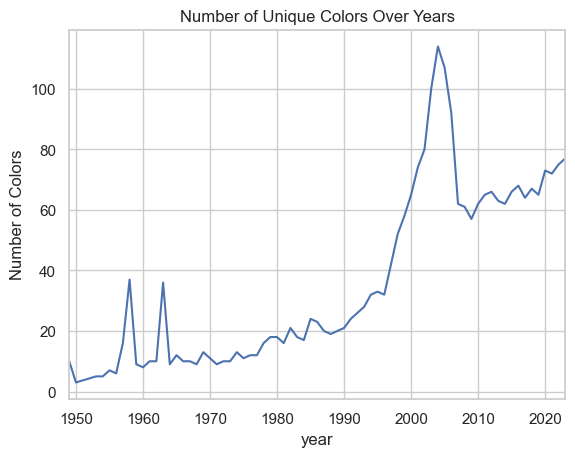

In [40]:
# Number of unique colors over years
df_plot_color = temp.groupby('year').count()['color_name']

sns.lineplot(data=df_plot_color)
plt.title('Number of Unique Colors Over Years')
plt.ylabel('Number of Colors')
plt.xlim(df_plot_color.index.min(), df_plot_color.index.max() - 1);

In [41]:
df_plot_color.diff().sort_values(ascending=False).head(20)

year
1963    26.0
1958    21.0
2003    20.0
2004    14.0
1997    10.0
1957    10.0
1998    10.0
2001     9.0
2020     8.0
1985     7.0
2000     7.0
2002     6.0
1999     6.0
2010     5.0
1982     5.0
2015     4.0
1969     4.0
1994     4.0
1978     4.0
1965     3.0
Name: color_name, dtype: float64

#### Colours Diversity Over Years

In [42]:
temp['color_info'] = temp['color_name'] + ' (' + temp['rgb'] + ')'
temp.head()

,year,color_name,rgb,quantity,color_info
0,1949,Blue,0055BF,48.0,Blue (0055BF)
1,1949,Bright Green,4B9F4A,3.0,Bright Green (4B9F4A)
2,1949,Green,237841,78.0,Green (237841)
3,1949,Red,C91A09,77.0,Red (C91A09)
4,1949,Vintage Blue,039CBD,24.0,Vintage Blue (039CBD)


In [43]:
# Export CSV file for visualization in Tableau
temp.to_csv('colors_over_years.csv', index=False)

In [44]:
temp = pd.read_csv('colors_over_years.csv')

In [45]:
# script for creating color pallete for Tableau
colors_info = temp['color_info'].sort_values().unique()
my_script = '<color-palette name="Lego_colours" type="regular">\n'

for color in colors_info:
    rgb = color[-7:-1]
    my_script += f'<color>#{rgb.lower()}</color>\n'

my_script += '</color-palette>'

In [46]:
viz_url = 'https://raw.githubusercontent.com/Lam-Truong/Data309/main/colors_overtime.png'
display(Image(url=viz_url))

Observations:
- The number of colors of LEGO parts has been increasing over the years.
- The number of colors increased significantly after 2000.
- The outstanding colors are `Black`, `White` and `Light/Dark Bluish Gray` and `Tan`. As in 2023, there were 48,789 parts in `Black` 35,207 in `Light Bluish Gray` and 35,892 parts in `White`.

In [27]:
rebrickable_all = pd.read_csv('rebrickable_all.csv')

In [33]:
rebrickable_all.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'inventory_id',
       'color_id', 'quantity', 'is_spare', 'color_name', 'rgb', 'is_trans'],
      dtype='object')

In [35]:
rebrickable_all.groupby('set_num').agg({'color_id': 'nunique'}).mean()

color_id    9.544693
dtype: float64

In [36]:
sets

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
...,...,...,...,...,...,...
23080,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
23081,YOTO-1,"1, 2, 3 Play with Me YOTO Cards",2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-1.jpg
23082,YOTO-2,A is for Alphabet,2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-2.jpg
23083,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
